# 1. Understand the dataSet

## 1.1 Observe the official documentation of dataSet

In [1]:
import pandas as pd
from scipy.io import arff
# Reading ARFF Files
file_path = '../DataSet/ObesityDataSet_raw_and_data_sinthetic.arff'
data, meta = arff.loadarff(file_path)

df = pd.DataFrame(data)

print("The first five rows of the dataset：")
print(df.head())

The first five rows of the dataset：
      Gender   Age  Height  Weight family_history_with_overweight   FAVC  \
0  b'Female'  21.0    1.62    64.0                         b'yes'  b'no'   
1  b'Female'  21.0    1.52    56.0                         b'yes'  b'no'   
2    b'Male'  23.0    1.80    77.0                         b'yes'  b'no'   
3    b'Male'  27.0    1.80    87.0                          b'no'  b'no'   
4    b'Male'  22.0    1.78    89.8                          b'no'  b'no'   

   FCVC  NCP          CAEC   SMOKE  CH2O     SCC  FAF  TUE           CALC  \
0   2.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  0.0  1.0          b'no'   
1   3.0  3.0  b'Sometimes'  b'yes'   3.0  b'yes'  3.0  0.0   b'Sometimes'   
2   2.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  2.0  1.0  b'Frequently'   
3   3.0  3.0  b'Sometimes'   b'no'   2.0   b'no'  2.0  0.0  b'Frequently'   
4   2.0  1.0  b'Sometimes'   b'no'   2.0   b'no'  0.0  0.0   b'Sometimes'   

                     MTRANS              NOb

In [2]:
print("The shape of the dataset: ")
print(df.shape)

print("\n Dataset information：")
print(df.info())

print("\n Statistical description of the dataset：")
print(df.describe().T)

The shape of the dataset: 
(2111, 17)

 Dataset information：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             21

## 1.2 Verify document statistics

In [3]:
# Define functions for calculating various indicators
def calculate_statistics(column):
    stats = {}
    stats['count'] = column.count()
    stats['mean'] = column.mean()
    stats['std'] = column.std()
    stats['min'] = column.min()
    stats['25%'] = column.quantile(0.25)
    stats['50%'] = column.median()
    stats['75%'] = column.quantile(0.75)
    stats['max'] = column.max()
    return stats

# Calculate statistics for all numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns
manual_stats = {}

for col in numeric_columns:
    manual_stats[col] = calculate_statistics(df[col])

manual_stats_df = pd.DataFrame(manual_stats)

print("Manually calculated statistics：")
print(manual_stats_df.T)

Manually calculated statistics：
         count       mean        std    min        25%        50%         75%  \
Age     2111.0  24.312600   6.345968  14.00  19.947192  22.777890   26.000000   
Height  2111.0   1.701677   0.093305   1.45   1.630000   1.700499    1.768464   
Weight  2111.0  86.586058  26.191172  39.00  65.473343  83.000000  107.430682   
FCVC    2111.0   2.419043   0.533927   1.00   2.000000   2.385502    3.000000   
NCP     2111.0   2.685628   0.778039   1.00   2.658738   3.000000    3.000000   
CH2O    2111.0   2.008011   0.612953   1.00   1.584812   2.000000    2.477420   
FAF     2111.0   1.010298   0.850592   0.00   0.124505   1.000000    1.666678   
TUE     2111.0   0.657866   0.608927   0.00   0.000000   0.625350    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00  


# 2. Analyze the dataSet

## 2.1 Distribution of the dependent variable of obesity level

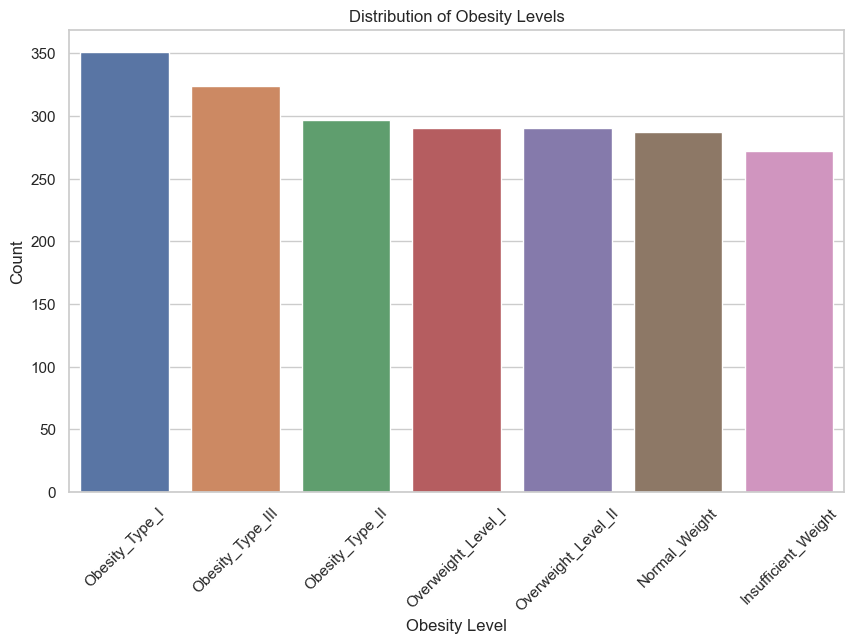

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# String data in .arff files is usually in byte format, so it needs to be decoded into UTF-8 format in order to be read and manipulated correctly.
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].str.decode('utf-8')

# Make the chart background a white grid to facilitate data visualization and reading.
sns.set(style="whitegrid")

# Distribution analysis for the target variable
plt.figure(figsize=(10, 6))
# The order parameter sorts the target variable by category frequency
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribution of Obesity Levels")
plt.xticks(rotation=45)
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.show()

## 2.2 Correlation between numerical variables

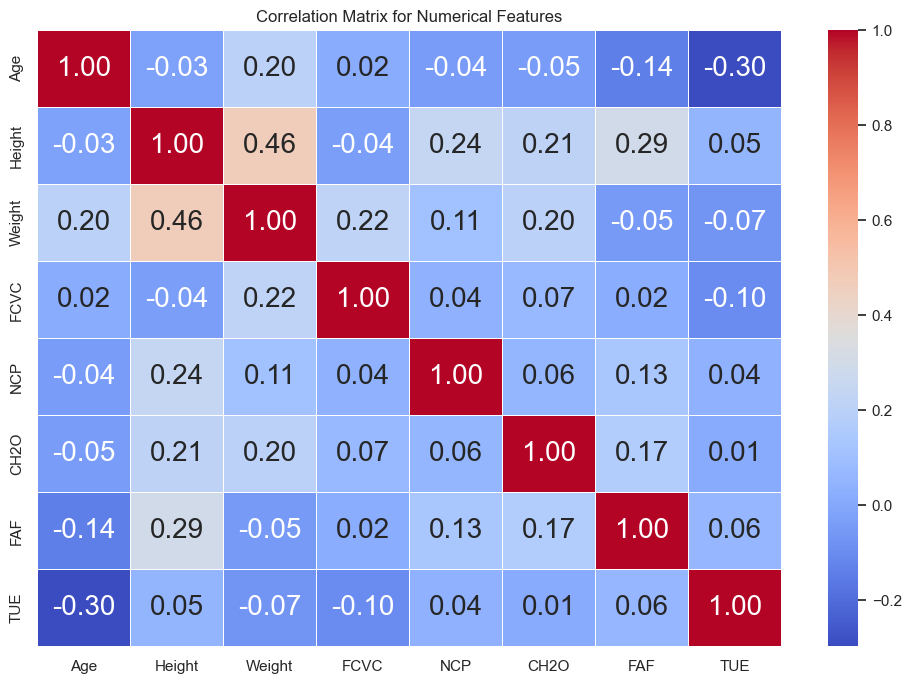

In [5]:
# Correlation analysis with a heatmap for numerical variables
numerical_features = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
# A heat map of the correlation matrix is ​​created to visually display the correlation between numerical variables.
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", annot_kws={"size": 20})
plt.title("Correlation Matrix for Numerical Features")
plt.show()

## 2.3 The influence of independent variables on the dependent variable of obesity

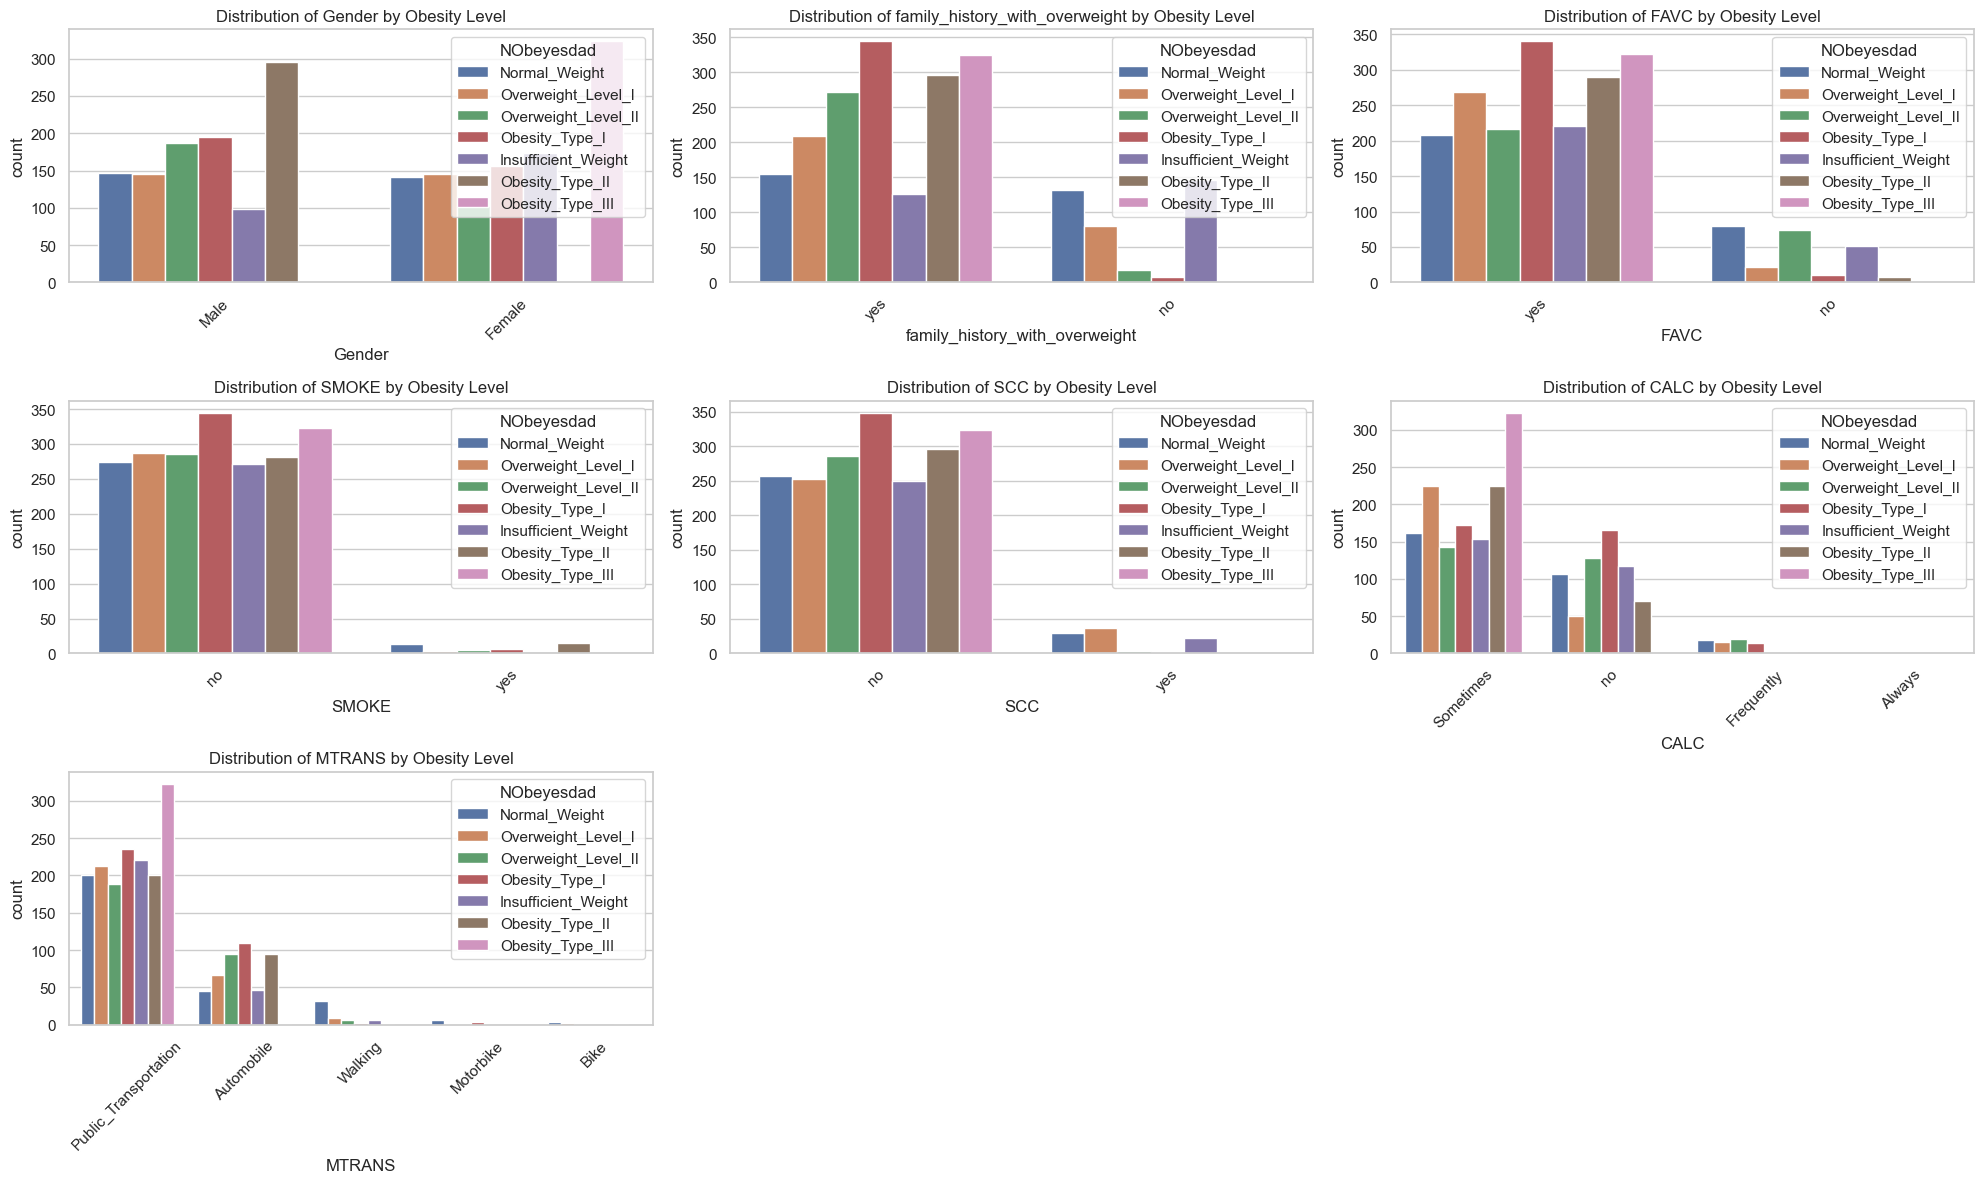

In [6]:
# Category variable analysis using count plots
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='NObeyesdad', order=df[col].value_counts().index)
    plt.title(f"Distribution of {col} by Obesity Level")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.3 Outlier Analysis

### 2.3.1 Method1: IQR - Replace outliers with lower/upper bounds

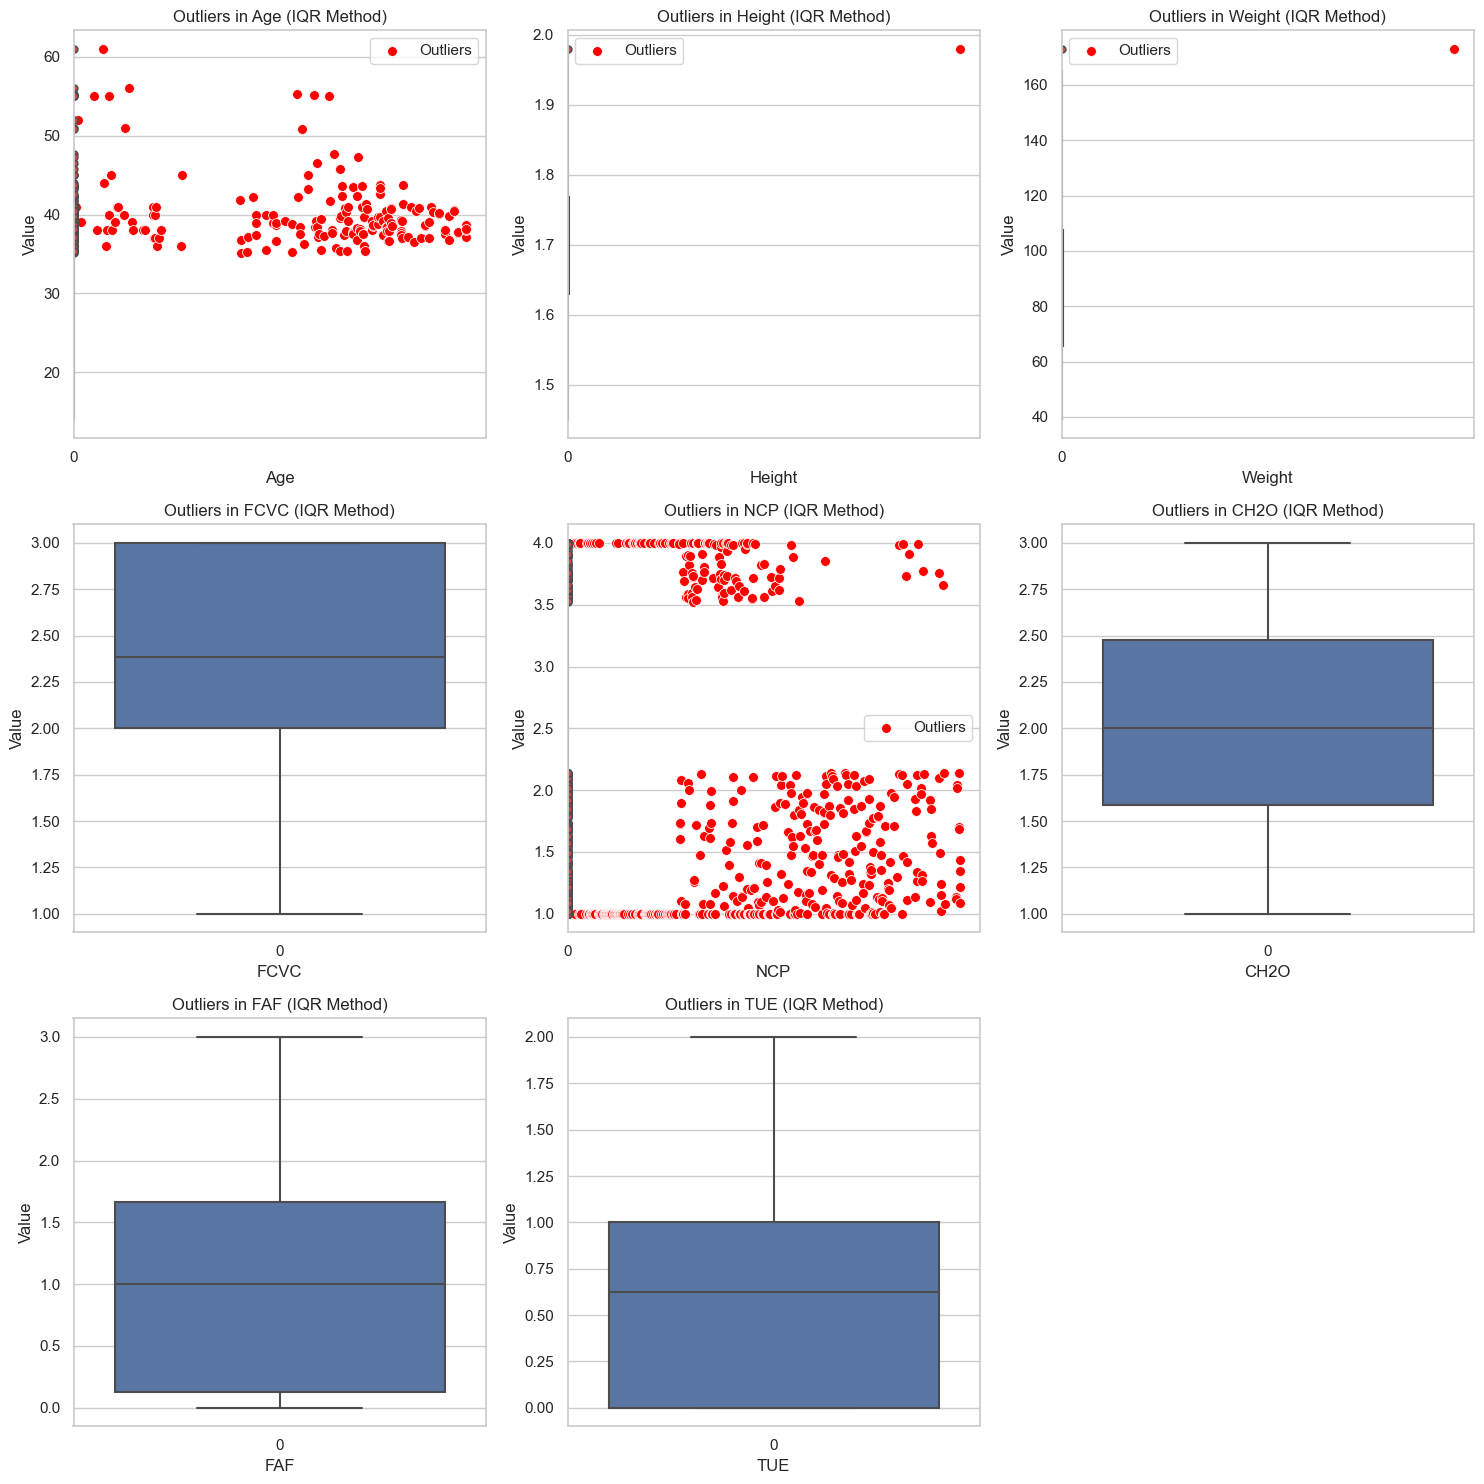

Cleaned Data (IQR Method):
    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0
4  22.0    1.78    89.8   2.0  3.0   2.0  0.0  0.0


In [7]:
# Select numerical columns for analysis
numerical_cols = df.select_dtypes(include=['float64']).columns
df_numerical = df[numerical_cols].copy()

# Functions for outlier detection
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound))

# Function to plot boxplot for each numerical column with dynamic subplots
def plot_outliers_dynamic(data, outliers, title):
    num_cols = data.shape[1]
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed for subplots
    
    plt.figure(figsize=(15, num_rows * 5))
    for i, col in enumerate(data.columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(data=data[col], flierprops=dict(markerfacecolor='r', marker='o'))
        outlier_points = data[outliers[col]][col]
        sns.scatterplot(x=outlier_points.index, y=outlier_points, color='red', label='Outliers', s=50)
        plt.title(f'Outliers in {col} ({title})')
        plt.xlabel(col)
        plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

# Method 1: IQR Method - Visualization and Handling
iqr_outliers = df_numerical.apply(detect_outliers_iqr)
plot_outliers_dynamic(df_numerical, iqr_outliers, 'IQR Method')

# Replace IQR outliers with median
df_iqr_cleaned = df_numerical.copy()
for col in df_numerical.columns:
    median = df_numerical[col].median()
    df_iqr_cleaned.loc[iqr_outliers[col], col] = median

# Display the first few rows of each cleaned dataset for comparison
print("Cleaned Data (IQR Method):")
print(df_iqr_cleaned.head())

### 2.3.2 Method 2: Z-Score - Outliers are replaced by the mean

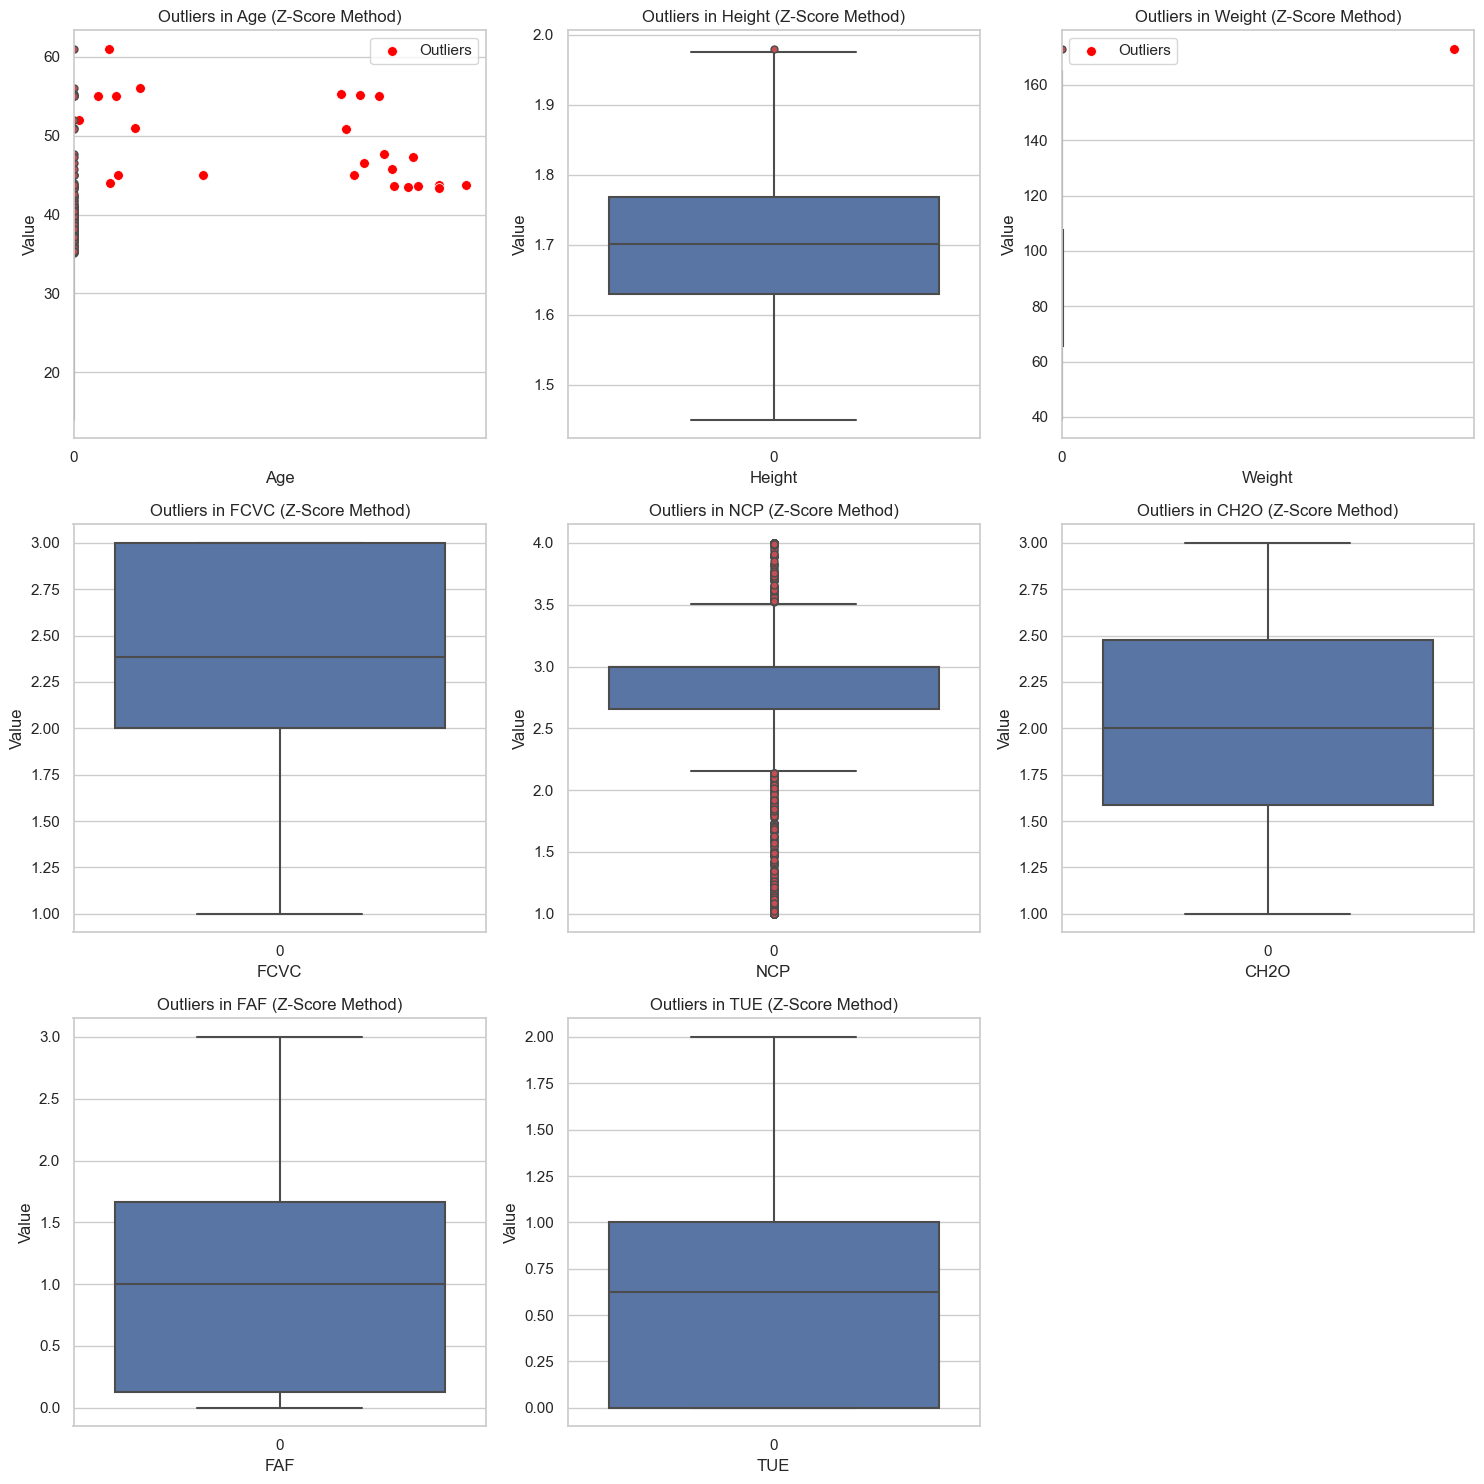


Cleaned Data (Z-Score Method):
    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0


In [8]:
import numpy as np
def detect_outliers_zscore(data, threshold=3):
    mean = data.mean()
    std = data.std()
    z_score = (data - mean) / std
    return (np.abs(z_score) > threshold)
    
zscore_outliers = df_numerical.apply(detect_outliers_zscore)
plot_outliers_dynamic(df_numerical, zscore_outliers, 'Z-Score Method')

# Replace Z-Score outliers with mean
df_zscore_cleaned = df_numerical.copy()
for col in df_numerical.columns:
    mean = df_numerical[col].mean()
    df_zscore_cleaned.loc[zscore_outliers[col], col] = mean

print("\nCleaned Data (Z-Score Method):")
print(df_zscore_cleaned.head())

### 2.3.3 Method 3: Modified Z-Score Method - Outliers are replaced by the median

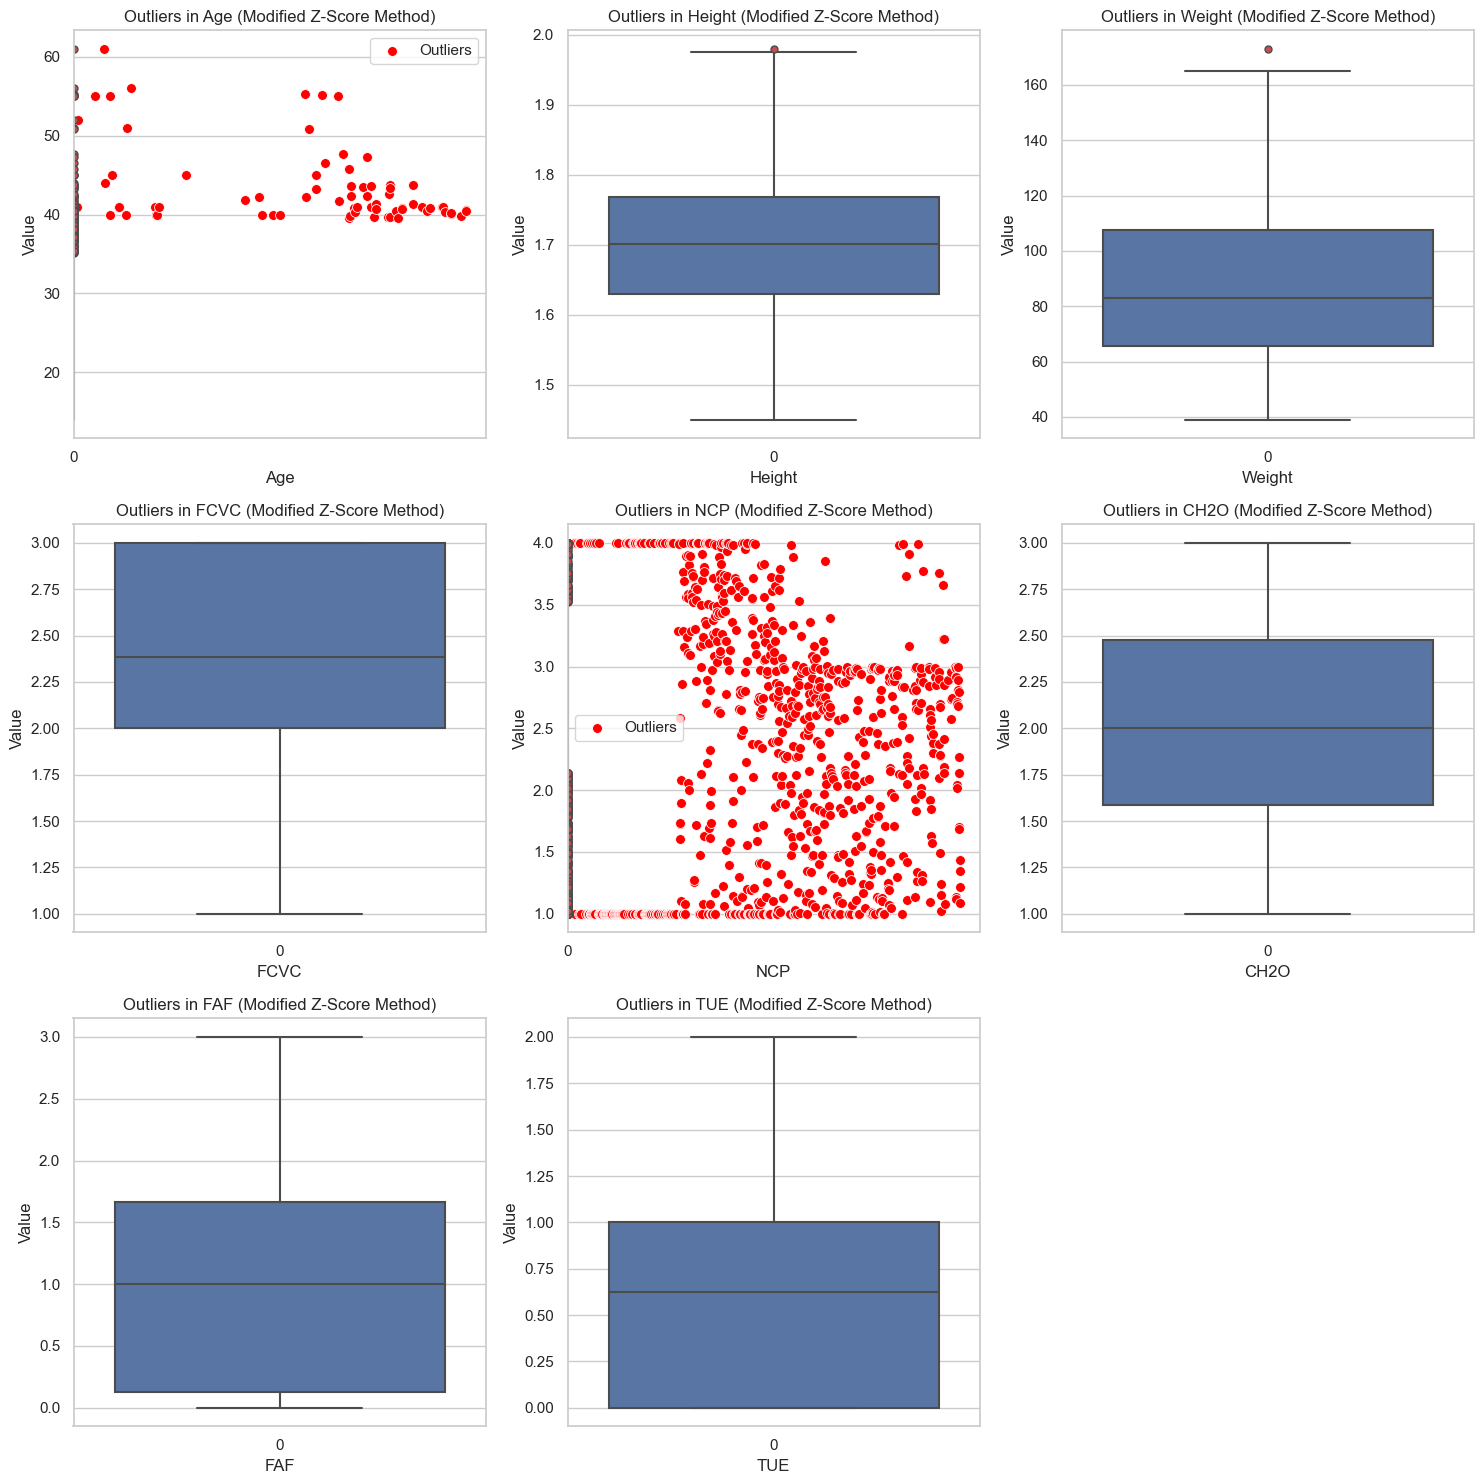


Cleaned Data (Modified Z-Score Method):
    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0
4  22.0    1.78    89.8   2.0  3.0   2.0  0.0  0.0


In [9]:
def detect_outliers_modified_zscore(data, threshold=3.5):
    median = data.median()
    mad = np.median(np.abs(data - median))
    modified_z_score = 0.6745 * (data - median) / mad
    return (np.abs(modified_z_score) > threshold)
    
modified_zscore_outliers = df_numerical.apply(detect_outliers_modified_zscore)
plot_outliers_dynamic(df_numerical, modified_zscore_outliers, 'Modified Z-Score Method')

# Replace Modified Z-Score outliers with median
df_modified_zscore_cleaned = df_numerical.copy()
for col in df_numerical.columns:
    median = df_numerical[col].median()
    df_modified_zscore_cleaned.loc[modified_zscore_outliers[col], col] = median

print("\nCleaned Data (Modified Z-Score Method):")
print(df_modified_zscore_cleaned.head())

# 3. Data preprocessing: Data preprocessing + Data encoding

## 3.1 Data preprocessing

### 3.1.1 Missing value handling: value -> mean; category -> mode

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Handle missing values
# For numerical columns, replace missing values with the mean
num_imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['float64']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['float64']))

# For categorical columns, replace missing values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object', 'category']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object', 'category']))

# Display the result to verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### 3.1.2 IQR-based outlier processing:

In [11]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Apply outlier capping for numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns
for col in numerical_columns:
    cap_outliers(df, col)

# Display information to verify outlier handling
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.910277,1.701676,86.584811,2.419043,2.835525,2.008011,1.010298,0.657866
std,5.277434,0.093299,26.187117,0.533927,0.400898,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,2.146845,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,35.079212,1.976160,170.366691,3.000000,3.511893,3.000000,3.000000,2.000000


### 3.1.3 Data type conversion: Replace weight and height with BMI

In [12]:
# Calculate BMI and drop Weight and Height columns
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df = df.drop(['Weight', 'Height'], axis=1)

## 3.2 Hot encoding of category variables

In [13]:
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# One-Hot Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                                         'SMOKE', 'SCC', 'CALC', 'MTRANS'], drop_first=False)

# Display information to verify transformations and encoding
df_encoded.info()
df_encoded.head()

# Prepare features and target for splitting
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   FCVC                                2111 non-null   float64
 2   NCP                                 2111 non-null   float64
 3   CH2O                                2111 non-null   float64
 4   FAF                                 2111 non-null   float64
 5   TUE                                 2111 non-null   float64
 6   NObeyesdad                          2111 non-null   int32  
 7   BMI                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   uint8  
 9   Gender_Male                         2111 non-null   uint8  
 10  family_history_with_overweight_no   2111 non-null   uint8  
 11  family_history_with_overweight_yes  2111 no

# 4. Prepare different types of data sets: 
## Facilitate subsequent research on which more advanced data preprocessing methods are helpful for the model.

## 4.1 Standard Version (for both Neural Network and Random Forest)

In [14]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2 Feature Scaling Version (for Neural Network)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4.3 PCA

In [16]:
from sklearn.decomposition import PCA
# Define number of components for PCA - this can be adjusted based on desired variance
n_components = 10  # for example, reduce to 10 principal components

# Apply PCA on the scaled data (from Version 2)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split PCA-transformed data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## 4.4 Binning Version (for Random Forest)

In [17]:
binned_df = df_encoded.copy()
binned_df['Age_bin'] = pd.cut(binned_df['Age'], bins=10, labels=False)  # 10 bins for Age
binned_df['BMI_bin'] = pd.cut(binned_df['BMI'], bins=10, labels=False)  # 10 bins for BMI
binned_df = binned_df.drop(['Age', 'BMI'], axis=1)  # Drop original Age and BMI after binning

X_binned = binned_df.drop('NObeyesdad', axis=1)
y_binned = binned_df['NObeyesdad']
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X_binned, y_binned, test_size=0.2, random_state=42)

# 4.5 Feature Interaction Version (for both Neural Network and Random Forest)

In [18]:
interaction_df = X.copy()
interaction_df['Age_BMI'] = df['Age'] * df['BMI']  # Example interaction feature between Age and BMI
interaction_df['FCVC_NCP'] = df['FCVC'] * df['NCP']  # Example interaction feature between FCVC and NCP

X_train_inter, X_test_inter, y_train_inter, y_test_inter = train_test_split(interaction_df, y, test_size=0.2, random_state=42)

In [19]:
datasets = {
    'standard': (X_train_std, X_test_std, y_train_std, y_test_std),
    'scaled': (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled),
    'pca': (X_train_pca, X_test_pca, y_train_pca, y_test_pca),
    'binned': (X_train_binned, X_test_binned, y_train_binned, y_test_binned),
    'interaction': (X_train_inter, X_test_inter, y_train_inter, y_test_inter)
}

# 5. Model definition and training

In [20]:
import numpy as np
import json
import joblib
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Create ANN model function with dynamic input shape
def create_ann_model(neurons, layers, input_shape, num_classes):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter tuning function
def hyperparameter_tuning(X_train, y_train, model_type, num_classes, version):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    X_train = X_train.astype(np.float32)
    y_train = y_train.astype(np.int32)

    if model_type == "RF":
        # params = {
        #     'n_estimators': [50],
        #     'max_depth': [10],
        #     'min_samples_split': [2]
        # }
        params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        rf_model = RandomForestClassifier(random_state=42)
        random_search_rf = RandomizedSearchCV(
            rf_model, param_distributions=params, n_iter=1, 
            cv=kf, scoring='accuracy', n_jobs=-1
        )
        random_search_rf.fit(X_train, y_train)
        best_rf_model = random_search_rf.best_estimator_
        best_rf_params = random_search_rf.best_params_
        
        # Save model as PKL
        joblib.dump(best_rf_model, f'RF_best_model_{version}.pkl')

        return best_rf_model, best_rf_params

    elif model_type == "ANN":
        y_train = to_categorical(y_train, num_classes=num_classes)
        input_shape = X_train.shape[1]
        best_score = 0
        best_params = None

        # param_grid = {
        #     'neurons': [16],
        #     'layers': [2],
        #     'epochs': [50],
        #     'batch_size': [20]
        # }
        param_grid = {
            'neurons': [16, 32],
            'layers': [1, 2],
            'epochs': [50, 100],
            'batch_size': [10, 20]
        }
        for neurons in param_grid['neurons']:
            for layers in param_grid['layers']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        scores = []
                        for train_idx, test_idx in kf.split(X_train):
                            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
                            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

                            model = create_ann_model(neurons, layers, input_shape, num_classes)
                            model.fit(
                                X_train_fold, y_train_fold, 
                                epochs=epochs, batch_size=batch_size, verbose=0
                            )
                            score = model.evaluate(X_test_fold, y_test_fold, verbose=0)[1]
                            scores.append(score)

                        mean_score = np.mean(scores)
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {
                                'neurons': neurons, 
                                'layers': layers, 
                                'epochs': epochs, 
                                'batch_size': batch_size
                            }

        best_ann_model = create_ann_model(best_params['neurons'], best_params['layers'], input_shape, num_classes)
        best_ann_model.fit(X_train, y_train, 
                           epochs=best_params['epochs'], 
                           batch_size=best_params['batch_size'], 
                           verbose=0)
        
        # Save model as H5
        best_ann_model.save(f'ANN_best_model_{version}.h5')

        return best_ann_model, best_params

    else:
        raise ValueError("Model type must be 'RF' or 'ANN'")

# Define datasets as numpy arrays
datasets = {
    'standard': (X_train_std.values.astype(np.float32), X_test_std.values.astype(np.float32), y_train_std.values, y_test_std.values),
    'scaled': (X_train_scaled.astype(np.float32), X_test_scaled.astype(np.float32), y_train_scaled, y_test_scaled),
    'pca': (X_train_pca.astype(np.float32), X_test_pca.astype(np.float32), y_train_pca, y_test_pca),
    'binned': (X_train_binned.values.astype(np.float32), X_test_binned.values.astype(np.float32), y_train_binned.values, y_test_binned.values),
    'interaction': (X_train_inter.values.astype(np.float32), X_test_inter.values.astype(np.float32), y_train_inter.values, y_test_inter.values)
}

# Train models for each dataset
results = {}
num_classes = len(np.unique(y))

for version, (X_train, X_test, y_train, y_test) in datasets.items():
    result = {'version': version}
    
    if version in ['standard', 'binned']:
        best_rf, best_rf_params = hyperparameter_tuning(X_train, y_train, "RF", num_classes, version)
        rf_accuracy = best_rf.score(X_test, y_test)
        result['RF'] = {'accuracy': rf_accuracy, 'params': best_rf_params}
    
    if version in ['scaled', 'pca', 'interaction']:
        best_ann, best_ann_params = hyperparameter_tuning(X_train, y_train, "ANN", num_classes, version)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        ann_accuracy = best_ann.evaluate(X_test, y_test_cat, verbose=0)[1]
        result['ANN'] = {'accuracy': ann_accuracy, 'params': best_ann_params}
    
    results[version] = result

# Save results to JSON (without model objects)
serializable_results = {}
for version, result in results.items():
    serializable_results[version] = {}
    for model_type, metrics in result.items():
        if isinstance(metrics, dict):
            serializable_results[version][model_type] = {
                'accuracy': metrics['accuracy'],
                'params': metrics['params']
            }

with open('model_results.json', 'w') as f:
    json.dump(serializable_results, f)

# Display results
serializable_results

{'standard': {'RF': {'accuracy': 0.966903073286052,
   'params': {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}}},
 'scaled': {'ANN': {'accuracy': 0.9432623982429504,
   'params': {'neurons': 32, 'layers': 2, 'epochs': 100, 'batch_size': 10}}},
 'pca': {'ANN': {'accuracy': 0.8250591158866882,
   'params': {'neurons': 32, 'layers': 2, 'epochs': 100, 'batch_size': 20}}},
 'binned': {'RF': {'accuracy': 0.9196217494089834,
   'params': {'n_estimators': 100,
    'min_samples_split': 2,
    'max_depth': None}}},
 'interaction': {'ANN': {'accuracy': 0.8888888955116272,
   'params': {'neurons': 32, 'layers': 2, 'epochs': 50, 'batch_size': 10}}}}

# 6. Model Evaluation


Evaluating Dataset: standard
RF Model (standard) Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
RF Model (standard) Evaluation Results:
Accuracy: 0.9669
Precision: 0.9671
Recall: 0.9669
F1 Score: 0.9670
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 1 58  0  0  0  2  1]
 [ 0  0 77  1  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 51  0]
 [ 0  0  0  0  0  2 48]]


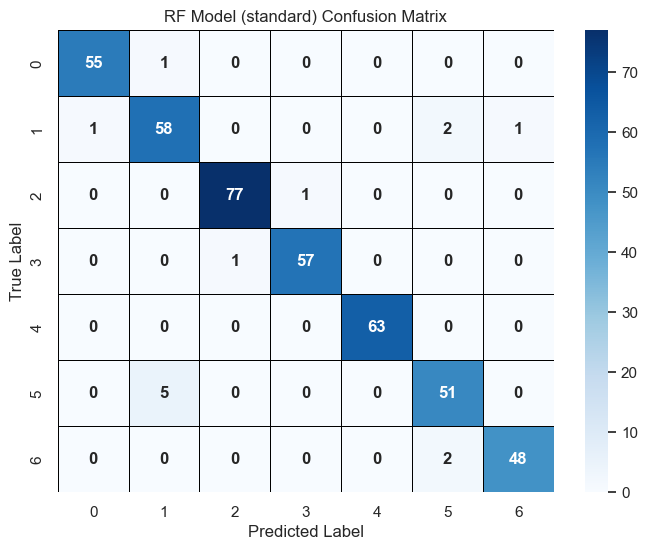

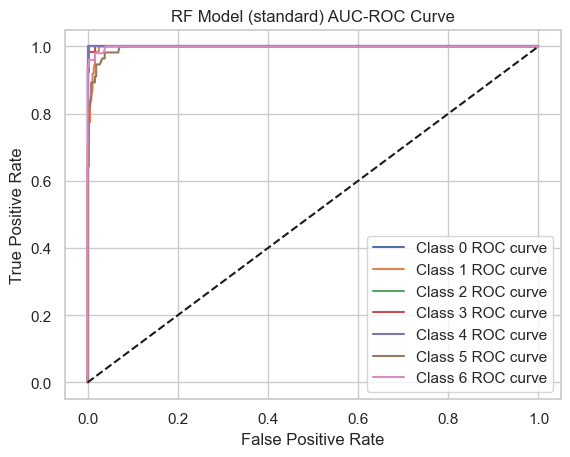


Evaluating Dataset: scaled
ANN Model (scaled) Best Parameters: {'neurons': 32, 'layers': 2, 'epochs': 100, 'batch_size': 10}
ANN Model (scaled) Evaluation Results:
Accuracy: 0.9433
Precision: 0.9435
Recall: 0.9433
F1 Score: 0.9429
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 5 51  0  0  0  6  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 50  1]
 [ 0  0  1  0  0  2 47]]


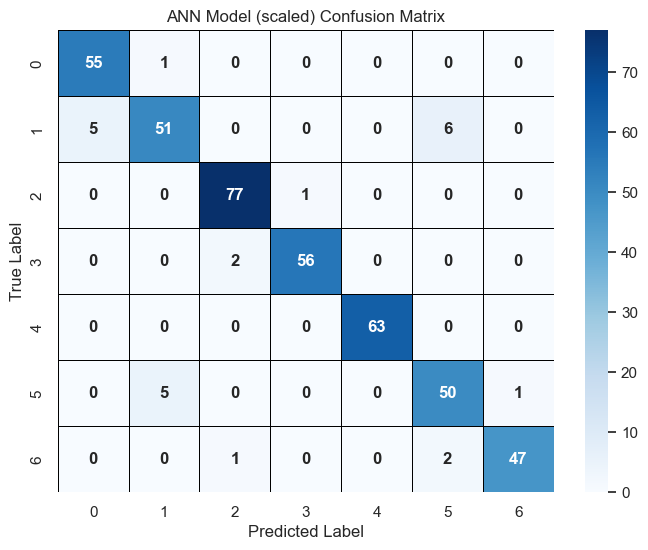

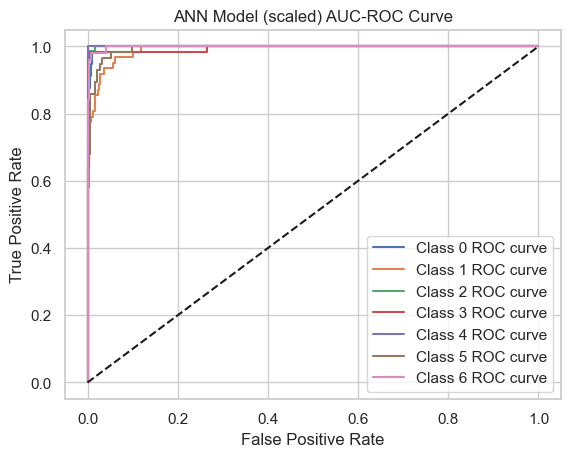


Evaluating Dataset: pca
ANN Model (pca) Best Parameters: {'neurons': 32, 'layers': 2, 'epochs': 100, 'batch_size': 20}
ANN Model (pca) Evaluation Results:
Accuracy: 0.8251
Precision: 0.8226
Recall: 0.8251
F1 Score: 0.8230
Confusion Matrix:
[[48  7  0  0  0  0  1]
 [ 6 37  2  1  0 10  6]
 [ 0  3 68  3  0  2  2]
 [ 1  0  0 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 3  9  2  0  0 42  0]
 [ 0  3  6  1  1  5 34]]


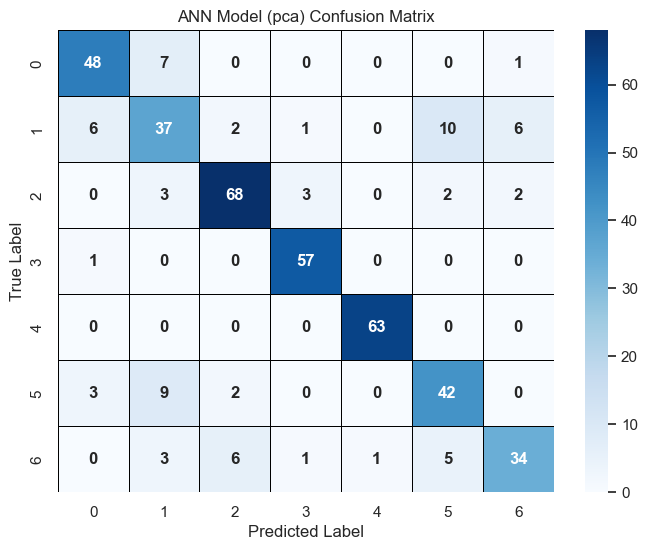

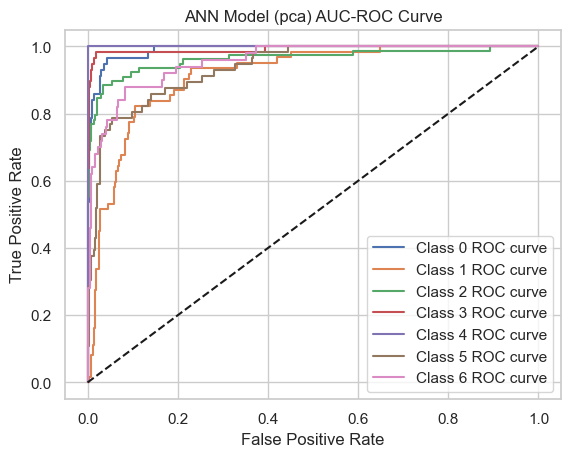


Evaluating Dataset: binned
RF Model (binned) Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
RF Model (binned) Evaluation Results:
Accuracy: 0.9196
Precision: 0.9192
Recall: 0.9196
F1 Score: 0.9191
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 6 51  0  0  0  5  0]
 [ 0  0 72  2  0  0  4]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 49  1]
 [ 0  0  5  0  0  2 43]]


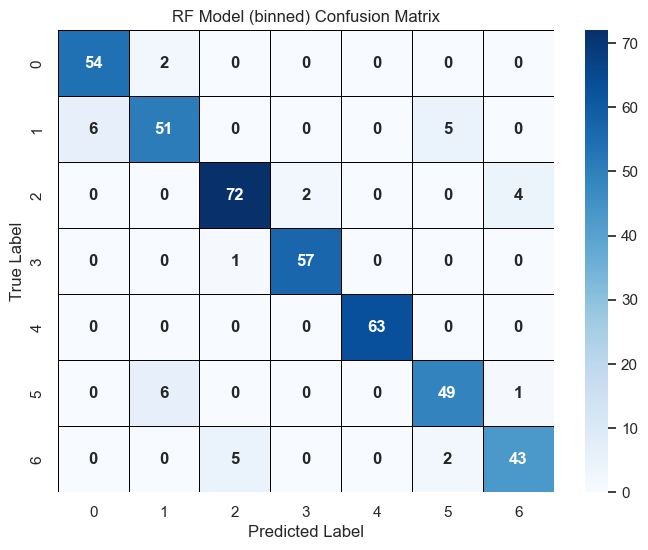

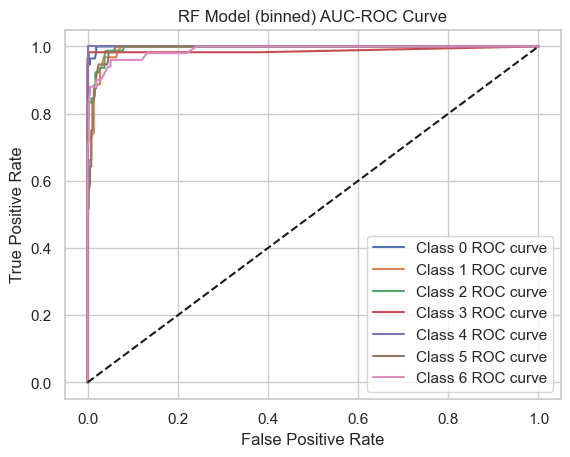


Evaluating Dataset: interaction
ANN Model (interaction) Best Parameters: {'neurons': 32, 'layers': 2, 'epochs': 50, 'batch_size': 10}
ANN Model (interaction) Evaluation Results:
Accuracy: 0.8889
Precision: 0.8998
Recall: 0.8889
F1 Score: 0.8865
Confusion Matrix:
[[56  0  0  0  0  0  0]
 [11 51  0  0  0  0  0]
 [ 0  0 77  0  0  0  1]
 [ 0  0 19 39  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0 11  0  0  0 44  1]
 [ 0  0  0  0  0  4 46]]


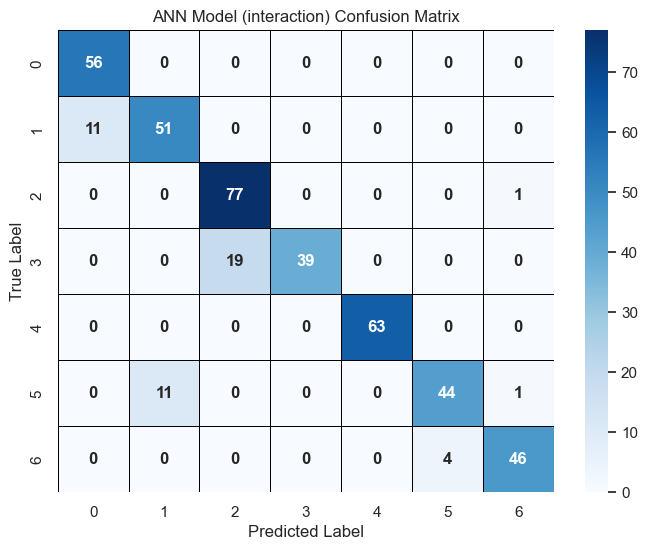

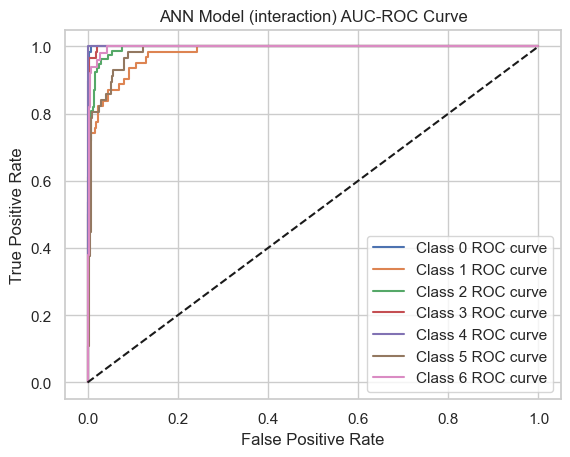

In [22]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                annot_kws={"size": 12, "weight": "bold"}, linewidths=0.5, linecolor='black')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Suppress AutoGraph warnings globally
@tf.autograph.experimental.do_not_convert
def model_predict(model, data):
    return model.predict(data)

# Define evaluation function
def evaluate_model(y_true, y_pred, y_proba, num_classes, model_name, best_params):
    # Output best model parameters
    print(f"{model_name} Best Parameters: {best_params}")

    # Calculate accuracy, precision, recall, F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Print evaluation results
    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix as a heatmap
    plot_confusion_matrix(conf_matrix, title=f'{model_name} Confusion Matrix')

    # AUC-ROC curve
    if num_classes > 2:  # Multiclass case
        y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
        auc = roc_auc_score(y_true_bin, y_proba, average='weighted', multi_class='ovr')

        # Plot multiclass ROC curve
        fpr = dict()
        tpr = dict()
        plt.figure()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
            plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
    else:  # Binary case
        auc = roc_auc_score(y_true, y_proba[:, 1])
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Load results file
with open('model_results.json', 'r') as f:
    results = json.load(f)

# Load and evaluate the best model for each dataset
for version, result in results.items():
    print(f"\nEvaluating Dataset: {version}")

    X_test = None
    y_test = None

    # Select the corresponding test set based on the version
    if version == 'standard':
        X_test, y_test = X_test_std.values, y_test_std.values
    elif version == 'scaled':
        X_test, y_test = X_test_scaled, y_test_scaled
    elif version == 'pca':
        X_test, y_test = X_test_pca, y_test_pca
    elif version == 'binned':
        X_test, y_test = X_test_binned.values, y_test_binned.values
    elif version == 'interaction':
        X_test, y_test = X_test_inter.values, y_test_inter.values

    # Ensure X_test is a NumPy array with the correct dtype
    X_test = np.array(X_test, dtype=np.float32)
    num_classes = len(np.unique(y_test))

    # Evaluate Random Forest model
    if 'RF' in result:
        best_rf_model = joblib.load(f'RF_best_model_{version}.pkl')
        best_rf_params = result['RF']['params']
        y_pred_rf = best_rf_model.predict(X_test)
        y_proba_rf = best_rf_model.predict_proba(X_test)
        evaluate_model(y_test, y_pred_rf, y_proba_rf, num_classes, f'RF Model ({version})', best_rf_params)

    # Evaluate ANN model
    if 'ANN' in result:
        best_ann_model = load_model(f'ANN_best_model_{version}.h5')

        best_ann_params = result['ANN']['params']
        y_test_cat = to_categorical(y_test, num_classes=num_classes)
        y_proba_ann = model_predict(best_ann_model, X_test)
        y_pred_ann = np.argmax(y_proba_ann, axis=1)
        evaluate_model(y_test, y_pred_ann, y_proba_ann, num_classes, f'ANN Model ({version})', best_ann_params)
